The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [156]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
df = pd.read_csv("data/nobel.csv")

# Commonly awarded gender and birth country
top_gender = df["sex"].value_counts().index[0]
top_country =df["birth_country"].value_counts().index[0]
print(f"The gender with most awarded is {top_gender}")
print(f"The country with most awarded is {top_country}")


The gender with most awarded is Male
The country with most awarded is United States of America


The highest proportion of US-born Nobel Prize winners occurred in the 2000s.


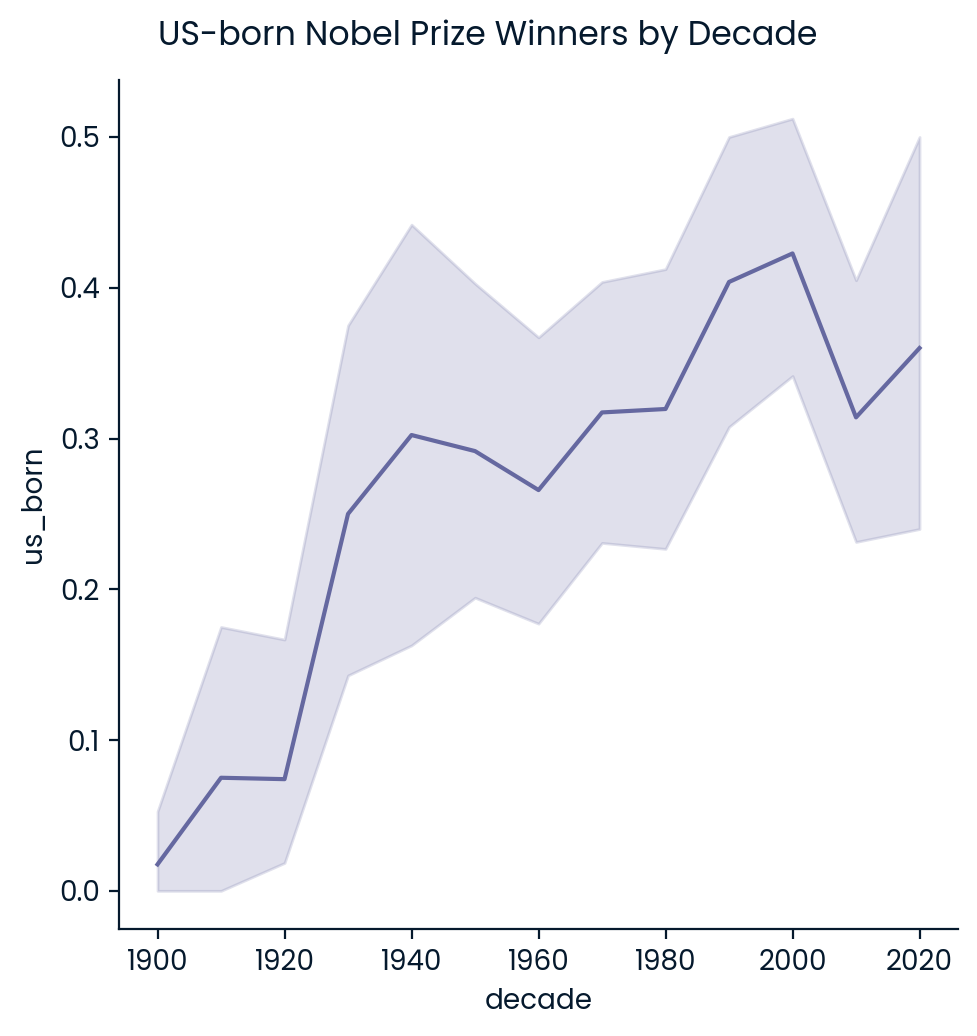

In [157]:
# Identify the decade with the highest ratio of US-born winners
df["us_born"] = df["birth_country"] == "United States of America"
df["decade"] = (df["year"]// 10) * 10
usa_winners = df.groupby("decade", as_index=False)["us_born"].mean()
max_decade_usa = usa_winners[usa_winners["us_born"]== usa_winners["us_born"].max()]["decade"].values[0]
print(f"The highest proportion of US-born Nobel Prize winners occurred in the {max_decade_usa}s.")

#Plot
g = sns.relplot(x="decade", y="us_born", data=df, kind="line")
g.fig.suptitle("US-born Nobel Prize Winners by Decade", y=1.03)
plt.show()

The Nobel Prize category with the highest proportion of female winners is at: {2020: 'Literature'}


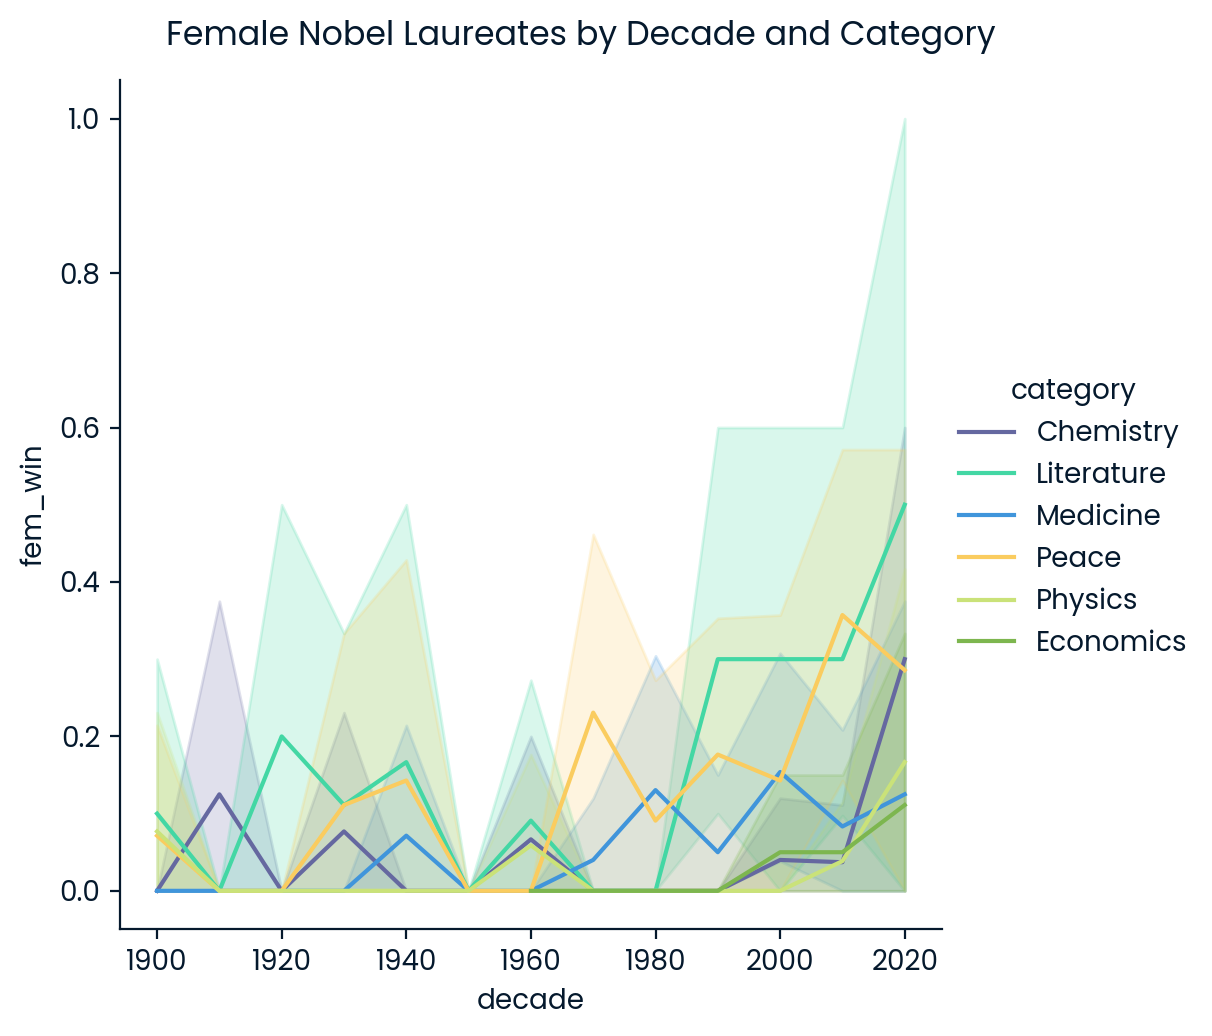

In [158]:
# Find the decade and category with the highest proportion of female laureates
df["fem_win"] = df["sex"] == "Female"
dec_cat_fem = df.groupby(["decade", "category"], as_index=False)["fem_win"].mean()
max_dec_cat_fem = dec_cat_fem[dec_cat_fem["fem_win"] == dec_cat_fem["fem_win"].max()]
max_female_dict = {max_dec_cat_fem["decade"].values[0]: max_dec_cat_fem["category"].values[0]}
print(f"The Nobel Prize category with the highest proportion of female winners is at: {max_female_dict}")

# Plot
g2 = sns.relplot(x="decade", y="fem_win", data=df, kind="line", hue= "category")
g2.fig.suptitle("Female Nobel Laureates by Decade and Category", y=1.03)
plt.show()

In [159]:
# Find first woman to win a Nobel Prize
fem_sort = df[df["fem_win"]]
female_yr = fem_sort[fem_sort["year"] == fem_sort["year"].min()]

first_woman_name = female_yr["full_name"].values[0]
first_woman_category = female_yr["category"].values[0]
print(f"The first female Nobel Prize winner was {first_woman_name} in the category of {first_woman_category}.")

The first female Nobel Prize winner was Marie Curie, née Sklodowska in the category of Physics.


In [160]:
# Count how many times each full name appears
winner_counts = df['full_name'].value_counts()

# Filter for those who have won 2 or more times
repeats = winner_counts[winner_counts >= 2].index

# Convert to a list
repeat_list = list(repeats)

# Print the result
print("Repeat Nobel Prize winners:", repeat_list)


Repeat Nobel Prize winners: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
